In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data_path = "C:/Users/HP/Downloads/CarPrice_Assignment.csv"
df = pd.read_csv(data_path)

# Display the information and check for if there is any missing values
print(df.info())
print(df.isnull().sum())

df.drop(columns=['car_ID'], inplace=True)      # Drop ID column if not useful

# Convert categorical to numerical
df = pd.get_dummies(df, drop_first=True)

# Splitting data into train and test
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()                     # Standardizing the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Train each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained successfully!")

Linear Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
Gradient Boosting trained successfully!
Support Vector Regressor trained successfully!


In [14]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate models
results = {name: {
    'R²': r2_score(y_test, model.predict(X_test_scaled)),
    'mse': mean_squared_error(y_test, model.predict(X_test_scaled)),
    'mae': mean_absolute_error(y_test, model.predict(X_test_scaled))
} for name, model in models.items()}

# Convert to DataFrame and then display
print(pd.DataFrame(results).T)

                                    R²           mse           mae
Linear Regression        -3.079183e+23  2.430831e+31  2.849316e+15
Decision Tree             8.558977e-01  1.137602e+07  2.200142e+03
Random Forest             9.535137e-01  3.669818e+06  1.363570e+03
Gradient Boosting         9.307984e-01  5.463056e+06  1.696863e+03
Support Vector Regressor -1.017086e-01  8.697331e+07  5.705033e+03


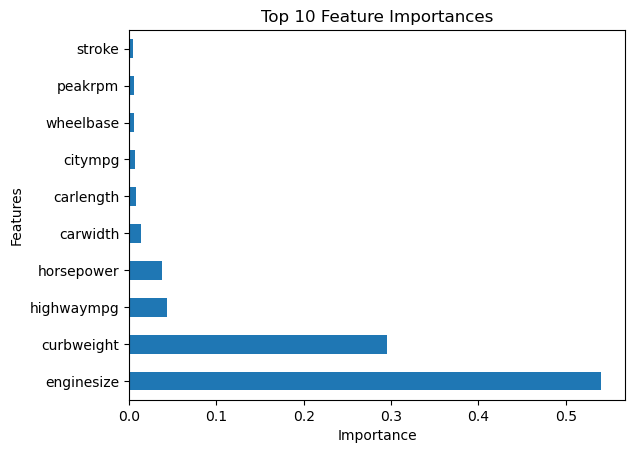

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from Random Forest model
importances = pd.Series(models['Random Forest'].feature_importances_, index=X.columns)

# Plot top 10 important features
importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Define hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

# Get the best model and evaluate
best_model = grid.best_estimator_
print("Best R² Score:", r2_score(y_test, best_model.predict(X_test_scaled)))

Best R² Score: 0.939123433840306
